# Práctica 7 - Métodos iterativos para sistemas lineales

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Ejercicio 1

Escribir un programa que implemente el método de Jacobi y otro que implemente el método de Gauss-Seidel para la resolución de un sistema lineal $Ax=b$, con las siguientes condiciones:

* que finalice si el método se estaciona
* que finalice con una advertencia si se excede cierto tope de iteraciones

$\textit{Sugerencia:}$ investigar los comandos $\texttt{np.tril}$, $\texttt{np.triu}$ y $\texttt{np.diag}$.

#### Observaciones


* $\texttt{np.tril}$ devuelve una copia de la matriz $A$, pero con los que estan por encima de la diagonal de la matriz hechos $0$.
* $\texttt{np.triu}$ devuelve una copia de la matriz $A$, pero con los que estan por debajo de la diagonal de la matriz hechos $0$.
* $\texttt{np.diag}$:
  - Si el input es una matriz $A$, devuelve su diagonal como un vector $v$ de una dimensión.
  - Si el input es un vector $v$ de una dimensión, construye una matriz diagonal $A$ con $v$ como diagonal.
 
Clarifico esto con un par de ejemplos:                    

In [2]:
# Defino una matriz para ejemplificar
A = np.asarray([[1,2,3],[4,5,6],[7,8,9]])

In [3]:
# Me quedo con la parte inferior + diagonal de la matriz
np.tril(A)

array([[1, 0, 0],
       [4, 5, 0],
       [7, 8, 9]])

In [4]:
# Me quedo con la parte inferior de la matriz
np.tril(A,-1)

array([[0, 0, 0],
       [4, 0, 0],
       [7, 8, 0]])

In [5]:
# Me quedo con la parte superior + diagonal de la matriz
np.triu(A)

array([[1, 2, 3],
       [0, 5, 6],
       [0, 0, 9]])

In [6]:
# Me quedo con la parte superior de la matriz
np.triu(A,1)

array([[0, 2, 3],
       [0, 0, 6],
       [0, 0, 0]])

In [7]:
# Me quedo con la diagonal de la matriz
np.diag(A)

array([1, 5, 9])

In [8]:
# Me quedo con la diagonal de la matriz como matriz
np.diag(np.diag(A))

array([[1, 0, 0],
       [0, 5, 0],
       [0, 0, 9]])

In [9]:
# Me quedo con la inversa de la diagonal como matriz
np.diag(1/np.diag(A))

array([[1.        , 0.        , 0.        ],
       [0.        , 0.2       , 0.        ],
       [0.        , 0.        , 0.11111111]])

### Método de Jacobi

En el método de Jacobi, escribimos a la matriz $A$ como

$$A=D+R$$

donde $D$ es diagonal y $R$ es la suma de una matriz triangular inferior $L$ y una matriz triangular superior $U$, es decir $R=L+U$. Para resolver $Ax=b$, tenemos:

$$(D+R)x=b$$
$$Dx + Rx = b$$

y por lo tanto,

$$x = D^{-1} (b-Rx)$$

Si fuera que $a_{ii}=0$ para todo $i$, entonces la regla iterativa del método de Jacobi puede ser definida como:

$$x^{(k+1)} = D^{-1} \left(b-Rx^{(k)}\right)$$

o de otra manera:

$$x_i^{(k+1)} = \frac{1}{a_{ii}} \left(b_i - \sum_{j\neq i} a_{ij}x_j^{(k)} \right) \, \text{, para todo } i$$

In [10]:
def Jacobi(A, b, tol = 1e-10, tope_iteraciones = 1000):
    # Chequeamos que las dimensiones sean apropiadas
    if A.shape[0] != A.shape[1]:
        raise ValueError("La matriz A no es cuadrada")
    if A.shape[1] != b.shape[0]:
        raise ValueError("Las dimensiones del sistema no cuadran")

    # Definimos a n como la dimensión de la matriz
    n = A.shape[0]

    # Inicializamos el vector respuesta
    x = np.zeros(n)
    
    k = 0
    while k < tope_iteraciones:
        x_nuevo = np.copy(x)

        for i in range(n):
            suma = sum(A[i][j] * x[j] for j in range(n) if j != i)  
            x_nuevo[i] = (b[i] - suma) / A[i][i]
        
        # Si el método se estacionó
        if np.linalg.norm(x_nuevo - x, ord = np.inf) < tol:
            return x_nuevo

        # Actualizamos el valor de x
        x = x_nuevo
        k += 1
        
    raise RuntimeError(f"Advertencia: se alcanzó el tope de {tope_iteraciones} iteraciones sin converger.")

In [11]:
# Defino una matriz y un vector para probar la función

A = np.asarray([[10,2,1],[1,10,2],[2,3,10]])
b = np.array([7,8,9])

In [12]:
# Vemos la solución que nos da Python con numpy
np.linalg.solve(A,b)

array([0.51372119, 0.62678375, 0.60922064])

In [13]:
# Vemos la solución que nos da nuestro método de Jacobi
Jacobi(A,b)

array([0.51372119, 0.62678375, 0.60922064])

In [14]:
# Afirmamos que dan lo mismo
assert np.allclose(Jacobi(A,b),np.linalg.solve(A,b))

---

In [15]:
# Defino otra matriz para probar cuando Jacobi no converge

A = np.asarray([[1,2,3],[4,5,6],[7,8,10]])
b = np.array([7,8,9])

In [16]:
# Vemos la solución que nos da nuestro método de Jacobi
# Ejecutar, tira error 
# Jacobi(A,b)

### Método de Gauss-Seidel

En el método de Gauss-Seidel, escribimos a la matriz $A$ como

$$A= R + U$$

donde $U$ es triangular superior con ceros en la diagonal y $R$ es la suma de una matriz triangular inferior $L$ y la matrix diagonal $D$, es decir $R=L+D$. Para resolver $Ax=b$, tenemos:

$$(R+U)x=b$$
$$Rx + Ux = b$$

y por lo tanto,

$$x = R^{-1} (b-Ux)$$

Si fuera que $a_{ii}=0$ para todo $i$, entonces la regla iterativa del método de Gauss-Seidel puede ser definida como:

$$x^{(k+1)} = (L+D)^{-1} \left(b-Ux^{(k)}\right)$$

o de otra manera:

$$x_i^{(k+1)} = \frac{1}{a_{ii}} \left(b_i - \sum_{j = i+1}^{n} a_{ij}x_j^{(k)} - \sum_{j=1}^{i-1}a_{ij}x_{j}^{(k+1)} \right) \, \text{, para todo } i$$

In [17]:
def Gauss_Seidel(A, b, tol = 1e-10, tope_iteraciones = 1000):
    # Chequeamos que las dimensiones sean apropiadas
    if A.shape[0] != A.shape[1]:
        raise ValueError("La matriz A no es cuadrada")
    if A.shape[1] != b.shape[0]:
        raise ValueError("Las dimensiones del sistema no cuadran")

    # Definimos a n como la dimensión de la matriz
    n = A.shape[0]

    # Inicializamos el vector respuesta
    x = np.zeros(n)

    k = 0
    while k < tope_iteraciones:
        x_nuevo = np.copy(x)

        for i in range(n):
            suma = sum(A[i][j] * x_nuevo[j] for j in range(i)) + sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_nuevo[i] = (b[i] - suma) / A[i][i]
            
        # Si el método se estacionó
        if np.linalg.norm(x_nuevo - x, ord = np.inf) < tol:
            return x_nuevo

        # Actualizamos el valor de x
        x = x_nuevo
        k += 1
        
    raise RuntimeError(f"Advertencia: se alcanzó el tope de {tope_iteraciones} iteraciones sin converger.")

In [18]:
# Defino una matriz y un vector para probar la función

A = np.asarray([[10,2,1],[1,10,2],[2,3,10]])
b = np.array([7,8,9])

In [19]:
# Vemos la solución que nos da Python con numpy
np.linalg.solve(A,b)

array([0.51372119, 0.62678375, 0.60922064])

In [20]:
# Vemos la solución que nos da nuestro método de Jacobi
Gauss_Seidel(A,b)

array([0.51372119, 0.62678375, 0.60922064])

In [21]:
# Afirmamos que dan lo mismo
assert np.allclose(Jacobi(A,b),np.linalg.solve(A,b))

## Ejercicio 4

Determinar si Jacobi y Gauss Seidel convergen para las siguientes matrices:

In [22]:
def converge_jacobi(A):
    L = np.tril(A,-1)
    D_inv = np.diag(1/np.diag(A))
    U = np.triu(A,1)

    M_j = - D_inv @ (L+U)

    radio_espectral = np.max(np.abs(np.linalg.eigvals(M_j)))

    return radio_espectral < 1

In [23]:
def converge_gauss_seidel(A):
    L = np.tril(A,-1)
    D = np.diag(np.diag(A))
    U = np.triu(A,1)

    M_gs = - np.linalg.inv(L+D)  @ U

    radio_espectral = np.max(np.abs(np.linalg.eigvals(M_gs)))
    return radio_espectral < 1

### i.
$$
A
=
\begin{pmatrix}
1 & 1 & 0 \\
-1 & 2 & 1 \\
0 & 0 & 1\\
\end{pmatrix}
$$

In [24]:
A = np.asarray([[1,1,0],[-1,2,1],[0,0,1]])
print ("Jacobi converge" if converge_jacobi(A) else "Jacobi no converge")
print ("Gauss-Seidel converge" if converge_gauss_seidel(A) else "Gauss-Seidel no converge")

Jacobi converge
Gauss-Seidel converge


### ii.
$$
B
=
\begin{pmatrix}
1 & 0 & -1 \\
-2 & 1 & 1 \\
-1 & 0 & -1\\
\end{pmatrix}
$$

In [25]:
B = np.asarray([[1,0,-1],[-2,1,1],[-1,0,-1]])
print ("Jacobi converge" if converge_jacobi(B) else "Jacobi no converge")
print ("Gauss-Seidel converge" if converge_gauss_seidel(B) else "Gauss-Seidel no converge")

Jacobi no converge
Gauss-Seidel no converge


### iii.
$$
C
=
\begin{pmatrix}
3 & -1 & -4 \\
-1 & 5 & 7 \\
-4 & 7 & 14\\
\end{pmatrix}
$$

In [26]:
C = np.asarray([[3,-1,-4],[-1,5,7],[-4,7,14]])
print ("Jacobi converge" if converge_jacobi(C) else "Jacobi no converge")
print ("Gauss-Seidel converge" if converge_gauss_seidel(C) else "Gauss-Seidel no converge")

Jacobi no converge
Gauss-Seidel converge


## Ejercicio 5

Decidir para cada uno de los siguientes sistemas, si los métodos de Jacobi y de Gauss-Seidel son convergentes. En caso afirmativo usarlos para resolver el sistema. Si ambos métodos convergen, determinar cuál converge más rápido. ¿Es la matriz del sistema diagonal dominante? ¿Y simétrica definida positiva?

In [27]:
def radio_espectral_jacobi(A):
    L = np.tril(A,-1)
    D_inv = np.diag(1/np.diag(A))
    U = np.triu(A,1)

    M_j = - D_inv @ (L+U)

    radio_espectral = np.max(np.abs(np.linalg.eigvals(M_j)))

    return radio_espectral

In [28]:
def radio_espectral_gauss_seidel(A):
    L = np.tril(A,-1)
    D = np.diag(np.diag(A))
    U = np.triu(A,1)

    M_gs = - np.linalg.inv(L+D)  @ U

    radio_espectral = np.max(np.abs(np.linalg.eigvals(M_gs)))
    return radio_espectral

### Inciso a
$$
\begin{equation}
\begin{pmatrix}
3 & 1 & 1 \\
2 & 6 & 1 \\
1 & 1 & 4 \\
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{pmatrix}
=
\begin{pmatrix}
5 \\
9 \\
6 \\
\end{pmatrix}
\end{equation}
$$

La matriz es diagonal dominante y no es simétrica.

Al ser estrictamente diagonal dominante, por la proposición 7.3.1 del apunte de Laplagne, Jacobi y Gauss-Seidel convergen.

Un resultado importante de notar es que $$\|e_k\| \leq C \rho(M_I)^k\,,$$ lo que nos da la velocidad de convergencia del algoritmo.

In [29]:
A = np.asarray([[3,1,1],[2,6,1],[1,1,4]])
print("Radio espectral de la matriz de Jacobi: ", radio_espectral_jacobi(A))
print("Radio espectral de la matriz de Gauss-Seidel: ", radio_espectral_gauss_seidel(A))

Radio espectral de la matriz de Jacobi:  0.5575346466519526
Radio espectral de la matriz de Gauss-Seidel:  0.1178511301977579


Por consiguiente, Gauss-Seidel converge más rápido en este caso que Jacobi

In [30]:
b = np.array([5,9,6])
print("La solución con Jacobi es: ", Jacobi(A,b))
print("La solución con Gauss-Seidel es: ", Gauss_Seidel(A,b))

La solución con Jacobi es:  [1. 1. 1.]
La solución con Gauss-Seidel es:  [1. 1. 1.]


### Inciso b
$$
\begin{equation}
\begin{pmatrix}
5 & 7 & 6 & 5 \\
7 & 10 & 8 & 7 \\
6 & 8 & 10 & 9 \\
5 & 7 & 9 & 10 \\
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
\end{pmatrix}
=
\begin{pmatrix}
23 \\
32 \\
33 \\
31 \\
\end{pmatrix}
\end{equation}
$$

In [31]:
A = np.asarray([[5,7,6,5],[7,10,8,7],[6,8,10,9],[5,7,9,10]])
# Afirmamos que la matriz es simétrica definida positiva
assert np.all(np.linalg.eigvals(A) > 0) and np.allclose(A.T, A)

La matriz es simétrica definida positiva y no es diagonal dominante. Al ser simétrica definida positiva, sabemos que Gauss-Seidel va a converger, pero todavía no sabemos qué onda con el amigo Jacobi.

In [32]:
print ("Jacobi converge" if converge_jacobi(A) else "Jacobi no converge")
print ("Gauss-Seidel converge" if converge_gauss_seidel(A) else "Gauss-Seidel no converge")

Jacobi no converge
Gauss-Seidel converge


Jacobi no converge. Entonces, resolvamos el sistema con Gauss-Seidel.

In [33]:
b = np.array([23,32,33,31])
print("La solución con Gauss-Seidel es: ", Gauss_Seidel(A,b,10000))

La solución con Gauss-Seidel es:  [ 4.6    -0.02    0.556   0.3136]


In [34]:
np.linalg.solve(A,b)

array([1., 1., 1., 1.])

¿What? Re mal ahí, el amigo Gauss-Seidel está tirando cualquier gagueada.

In [35]:
radio_espectral_gauss_seidel(A)

0.9968975928986463

Aaaah, ok, tenemos un radio espectral re cercano a $1$. Quizás teóricamente Gauss-Seidel converge, pero a nosotros sospecho que el error de máquina nos va a matar. No vamos a llegar a converger.

## Método del gradiente

## Ejercicio 15

Implementar el método del gradiente descripto en el Ejercicio 13, eligiendo en cada paso el valor de $t$ óptimo. El algoritmo debe detenerse cuando la diferencia entre dos iteraciones sucesivas es menor que una tolerancia dada. Además, debe almacenar toda la sucesión de puntos generada y devolverla en forma de matriz de $N \times n$, donde $n$ es el tamaño del problema y $N$ el número de iteraciones realizadas.

In [44]:
def metodo_gradiente(A, b, x_0, tol = 1e-6):
    x_k = x_0
    r_k = b - A @ x_0
    puntos = np.array([x_k.copy()])
    
    while np.linalg.norm(r_k) >= 1e-6:
        # Calculamos el t óptimo
        t_k = (r_k.T @ r_k) / (r_k.T @ A @ r_k)

        # Actualizamos x_k
        x_k = x_k + t_k * r_k
        
        # Añadimos el x_k actual
        puntos = np.vstack([puntos, x_k.copy()])

        # Calculamos el nuevo residuo
        r_k  = b - A @ x_k

    return puntos

## Ejercicio 16

### Inciso a

Aplicar el método del gradiente a la resolución del sistema $Ax=b$, siendo:

$$
A
=
\begin{pmatrix}
2 & 1 \\
1 & 12 
\end{pmatrix}
,
\,
b=
\begin{pmatrix}
7 \\
-5
\end{pmatrix}\,.
$$

In [45]:
A = np.asarray([[2,1],[1,12]])
b = np.array([7,-5])

In [46]:
puntos = metodo_gradiente(A, b, np.array([0,0]))

In [47]:
puntos

array([[ 0.        ,  0.        ],
       [ 1.57926829, -1.12804878],
       [ 2.09868058, -0.40087157],
       [ 2.82142379, -0.91711672],
       [ 3.05912988, -0.58432818],
       [ 3.38988922, -0.82058485],
       [ 3.49867407, -0.66828606],
       [ 3.65004421, -0.77640759],
       [ 3.69982898, -0.70670891],
       [ 3.76910267, -0.75619011],
       [ 3.79188639, -0.72429291],
       [ 3.8235891 , -0.7469377 ],
       [ 3.83401594, -0.73234012],
       [ 3.84852451, -0.74270339],
       [ 3.85329629, -0.73602289],
       [ 3.85993606, -0.74076558],
       [ 3.86211984, -0.73770828],
       [ 3.86515849, -0.73987875],
       [ 3.86615788, -0.7384796 ],
       [ 3.8675485 , -0.7394729 ],
       [ 3.86800587, -0.73883258],
       [ 3.86864228, -0.73928716],
       [ 3.86885159, -0.73899412],
       [ 3.86914284, -0.73920216],
       [ 3.86923863, -0.73906805],
       [ 3.86937192, -0.73916326],
       [ 3.86941576, -0.73910189],
       [ 3.86947676, -0.73914546],
       [ 3.86949682,

In [48]:
sol = puntos[-1]
sol

array([ 3.86956493, -0.73913038])

### Inciso b

Si X es la matriz que devuelve el método, correr la siguiente iteración, e interpretar qué hace cada línea

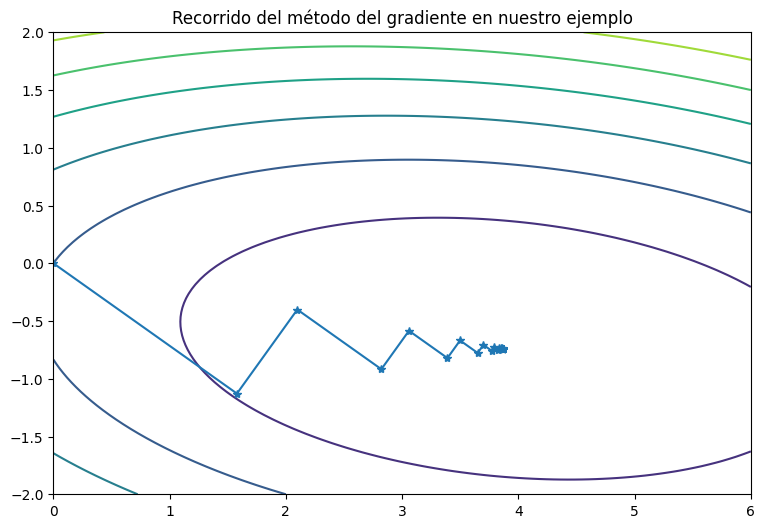

In [56]:
# Generamos el espacio donde vamos a graficar
x = np.linspace(0, 6, 100)
y = np.linspace(-2, 2, 100)
xx, yy = np.meshgrid(x,y)
zz = np.zeros(xx.shape)

# Graficamos los valores de la función cuadrática como curvas de nivel
for i in range(xx.shape[0]):
    for j in range(yy.shape[1]):
        vec = np.array([xx[i, j], yy[i, j]])
        zz[i,j] = 0.5 * vec @ A @ vec - b @ vec
plt.figure(figsize=(9,6))
plt.contour(xx,yy,zz)

# Graficamos el recorrido del método del gradiente
plt.title("Recorrido del método del gradiente en nuestro ejemplo")
plt.plot(puntos[:,0], puntos[:,1], '*-')
plt.show()